In [1]:
# For GPU users
!pip install tensorflow[and-cuda]
# For CPU users
!pip install tensorflow


In [2]:
!pip install opencv-python

In [3]:
!pip3 install -U scikit-learn

In [4]:
!pip install mediapipe

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic  = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #utilidades de dibujo

In [4]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convierte de BGR a RGB
    image.flags.writeable = False  #La imagen no es writeable
    results = model.process(image)  #image es el frame del open cv, hace la prediccion
    image.flags.writeable = True     #la imagen es writable 
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #convierte de RGB a BGR
    return image,results 


In [5]:
def draw_landmarks(image,results): #dibujar las marcas en la imagen
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION) #dibuja las conecciones de la cara
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #Dibuja las pose conecciones
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #dibuja las conecciones de la mano izquierda
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #dibuja las conecciones de la mano derecha 

    

In [6]:
def draw_styled_landmarks(image,results): #dibuja los landmarks refinados 
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(50,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #dibuja las conecciones de la cara
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) #Dibuja las pose conecciones
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)) #dibuja las conecciones de la mano izquierda
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(254,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)) #dibuja las conecciones de la mano derecha 


In [7]:
#abre la webcam y va entre los frames
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  while cap.isOpened():
    #lee el feed
    ret,frame = cap.read()

    #hace la deteccion
    image, results = mediapipe_detection(frame,holistic)
    print(results)
    #dibuja  los landmarks
    draw_styled_landmarks(image,results)
    #Lo muestra en la pantalla
    cv2.imshow('OpenCV Feed',image)

    #Rompe el loop si se apreta q
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame,results)

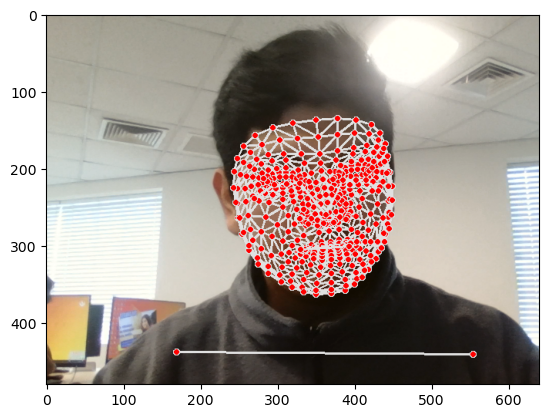

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [12]:
results.face_landmarks

landmark {
  x: 0.5775410532951355
  y: 0.6155502796173096
  z: -0.03526432812213898
}
landmark {
  x: 0.5757290124893188
  y: 0.5548895597457886
  z: -0.07676247507333755
}
landmark {
  x: 0.5736747980117798
  y: 0.5724001526832581
  z: -0.038128651678562164
}
landmark {
  x: 0.5549938678741455
  y: 0.4931839406490326
  z: -0.06354144960641861
}
landmark {
  x: 0.5745550990104675
  y: 0.5356050133705139
  z: -0.08288497477769852
}
landmark {
  x: 0.5712380409240723
  y: 0.5098451375961304
  z: -0.07890986651182175
}
landmark {
  x: 0.5616950392723083
  y: 0.44788724184036255
  z: -0.04487554356455803
}
landmark {
  x: 0.4512289762496948
  y: 0.45724743604660034
  z: -0.000816442770883441
}
landmark {
  x: 0.5571830868721008
  y: 0.40325966477394104
  z: -0.03898283466696739
}
landmark {
  x: 0.5557118654251099
  y: 0.37817931175231934
  z: -0.04417698085308075
}
landmark {
  x: 0.547136127948761
  y: 0.28648442029953003
  z: -0.036021359264850616
}
landmark {
  x: 0.5780900716781616
 

In [13]:
pose = [] #array para gaursar los landmarks
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [14]:
pose

[array([ 0.56739163,  0.5417462 , -1.74033332,  0.9999364 ]),
 array([ 0.6027084 ,  0.44940421, -1.67143822,  0.99984109]),
 array([ 0.62902194,  0.44854575, -1.67187881,  0.9998433 ]),
 array([ 0.64908558,  0.44852498, -1.67210996,  0.99979067]),
 array([ 0.5155226 ,  0.45633072, -1.67901349,  0.99985486]),
 array([ 0.48763728,  0.45880395, -1.6781193 ,  0.99986899]),
 array([ 0.4628796 ,  0.46100575, -1.67867601,  0.99985462]),
 array([ 0.67445815,  0.47842988, -1.10760891,  0.99981493]),
 array([ 0.42246094,  0.49878103, -1.11574054,  0.99990952]),
 array([ 0.61558306,  0.62809241, -1.51596272,  0.99992859]),
 array([ 0.51671129,  0.63571352, -1.52060091,  0.99994951]),
 array([ 0.86635607,  0.91888213, -0.6940012 ,  0.99639016]),
 array([ 0.26407844,  0.91439569, -0.72542495,  0.99772006]),
 array([ 1.02526617,  1.3630178 , -0.72550905,  0.0678966 ]),
 array([ 0.12742504,  1.44832194, -0.69281572,  0.43685579]),
 array([ 0.97546309,  1.7652173 , -1.30177522,  0.03288047]),
 array([

In [15]:
pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)#todos los landmarks en un solo array grande
face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)#todos los landmarks en un solo array grande
lh = np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
rh = np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande

In [16]:

def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)#todos los landmarks en un solo array grande
    face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)#todos los landmarks en un solo array grande
    lh = np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
    rh = np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
    return np.concatenate([pose,face,lh,rh])
    

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.56739163,  0.5417462 , -1.74033332, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
np.save('0',result_test)

In [20]:
np.load('0.npy')

array([ 0.56739163,  0.5417462 , -1.74033332, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
extract_keypoints(results).shape

(1662,)

In [22]:
#path para la data exportada
DATA_PATH = os.path.join('MP_Data') # variable que guarda 

#Aciones detectadas
actions = np.array(['hello','thanks','iloveyou'])
no_sequences = 30 #Cantidad de videos que se recolectaran por accion
sequence_length = 30 #30 es la cantidad de frames de data que va a utilizar 
#lo que se hara para la info es recolectar 30 videos de 30 frames cada un por accion (son 3 acciones) por la cantidad de keypoints que se tienen que son 1662 (entre todas las  variables)

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [25]:
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
    #lee el feed
                ret,frame = cap.read()

    #hace la deteccion
                image, results = mediapipe_detection(frame,holistic)
                print(results)
            #dibuja  los landmarks
                draw_styled_landmarks(image,results)
            
                if frame_num == 0 :
                    cv2.putText(image,'Sarting Collection',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)# IMprime Starting Collection
                    cv2.putText(image,'Colelecting Frasmes for {} Video Number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                
                else :
                    cv2.putText(image,'Colelecting Frasmes for {} Video Number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                
                #Exportamos los Keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #Lo muestra en la pantalla
                cv2.imshow('OpenCV Feed',image)

                #Rompe el loop si se apreta q
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [33]:
cap.release()
cv2.destroyAllWindows()

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map = {label:num for num, label in enumerate(actions)} #esto loopea entre cada una de las palabras

In [36]:
label_map #se estructura en un array grande por accion, se termina creando 90 arrays con 30 fraames en cada array con 1662 valores que representan los keypoints

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [37]:
sequences, labels = [],[] # sequences representa la dara y labels representa los label
for action in actions: # se loopea entre las acciones y las sequencias
    for sequence in range(no_sequences):
        window = [] #windows representa todas las ventanas de video
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num))) # se cargan los diferentes frames desde las carpetas  
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\hello\\20\\0.npy'

In [38]:
sequences.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
x = np.array(sequences)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [35]:

model = Sequential() # Se rean layers para entrenar los modelos 
model.add(LSTM(64,return_sequences = True, activation='relu',input_shape = (30,1662)))
model.add(LSTM(128,return_sequences = True, activation='relu'))
model.add(LSTM(64,return_sequences = False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0],activation = 'softmax')) #softmas te da un conjunto de probabilidades que sumadas te suman 1  

In [ ]:
actions[np.argmax(res)]

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [1]:

model.fit(x_train,y_train, epochs = 2000, callbacks = [tb_callback])

NameError: name 'model' is not defined

In [ ]:
res = model.predict(x_test)

In [ ]:
actions[np.sum(res[0])]

In [ ]:
actions[np.argmax(y_test[0])]

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(x_train)

In [ ]:
ytrue = np.argmax(y_test, axis = 1).tolist()
yhat =  np.argmax(yhat,axis = 1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue,yhat)

In [ ]:
accuracy_score(ytrue,yhat)

*Real time Testing*

In [ ]:
colors = [(245,117,16),(117,245,16),(16,117,245)]
def prob_viz(res,actions,imput_frame,colors):
    output_frame = imput_frame.copy()
    for num,prob in enumerate(res):
        cv2.rectangle(output_frame,(0,60+num*40),(int(prob*100),90+num*40), colors[num,-1])
        cv2.putText(output_frame,actions[num],(0,85+num*40), cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
    
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res,actions,image,colors))

In [1]:
#Variables de deteccion
sequence = []
sentence = []
predictions = []
threshold = 0.5


#abre la webcam y va entre los frames
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  while cap.isOpened():
    #lee el feed
    ret,frame = cap.read()

    #hace la deteccion
    image, results = mediapipe_detection(frame,holistic)
    print(results)
    #dibuja  los landmarks
    draw_styled_landmarks(image,results)
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    #[-30:] son los ultimos 30 frames/ 30 set de keypoints
    sequence = sequence[-30:]
    
    #si la longitud de la sequencia tiene una longitud de 30 frames, recien ahi se hace la prediccion
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence,axis = 0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))
        
        
       #viz Logic 
        if np.unique(predictions[-10:])[0] == np.argmax(res):
          if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
              if actions[np.argmax(res)] != sentence[-1]:
                sentence.append(actions[np.argmax(res)])
              else:
                sentence.append(actions[np.argmax(res)])
      
          if len(sentence) > 5:
            sentence = sentence[-5:]
    
    #Visualizar probabilidades
    image = prob_viz(res,actions,image, colors)
    
    cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
    cv2.putText(image,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
          
    
    #Lo muestra en la pantalla
    cv2.imshow('OpenCV Feed',image)

    #Rompe el loop si se apreta q
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [ ]:
model.predict(x_test[0])